In [4]:
"""
Created on Tue Jul 10 10:32:43 2018

@author: aashish
"""

import numpy as np
import pandas as pd

##Implementing Logistic regression
# Calculate the sigma function given z
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Calculate the cost function
def cost_function(X,y,theta):
    m = X.shape[0]
    z = np.dot(X, theta.T)
    h = sigmoid(z)
    error = np.multiply(y, np.log(h)) + np.multiply((1 - y), np.log(1 - h))
    const = -1/m
    cost = const * sum(error)
    return cost

# Calculate the gradient and update the theta matrix
def gradientDescent(X, y, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(X.shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = cost_function(X, y, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = sigmoid((X * theta.T)) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = cost_function(X, y, theta)
        
    return theta, cost

##Load the data
titanic_train = pd.read_csv("train.csv")

##Preprocessing the training data
# Fill the missing value in "Age"
titanic_train["Age"] = titanic_train["Age"].fillna(titanic_train["Age"].median())
# Converting the Sex Column to numeric value
titanic_train.loc[titanic_train["Sex"] == "male", "Sex"] = 0
titanic_train.loc[titanic_train["Sex"] == "female", "Sex"] = 1
# Converting the Embarked Column
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("S")
titanic_train.loc[titanic_train["Embarked"] == "S", "Embarked"] = 0
titanic_train.loc[titanic_train["Embarked"] == "C", "Embarked"] = 1
titanic_train.loc[titanic_train["Embarked"] == "Q", "Embarked"] = 2

# Droping less useful data columns
titanic_train = titanic_train.drop(['Ticket','Cabin','Name','PassengerId'], axis=1) 

# Drop NaN values
titanic_train = titanic_train.dropna()

# Normalizing the dataset 
titanic_train = (titanic_train - titanic_train.mean()) / titanic_train.std()
print(titanic_train.shape)
# Separating the attributes and the target values
cols = titanic_train.shape[1]
X = titanic_train.iloc[1:,0:cols-1]
y = titanic_train.iloc[1:,cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))
print(X.shape, y.shape, theta.shape)
# Defining the hyperparametters
alpha = 0.001
iters = 1000

print ("Initial cost: ", cost_function(X, y, theta))

g, cost = gradientDescent(X, y, theta, alpha, iters)
print ("Theta: ", g)
print ("End cost:     ", cost_function(X, y, g))

# Loading test data
titanic_test = pd.read_csv("test.csv")
##Preprocessing the training data
# Fill the missing value in "Age"
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())
# Converting the Sex Column to numeric value
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
# Converting the Embarked Column
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

# Droping less useful data columns
titanic_test = titanic_test.drop(['Ticket','Cabin','Name','PassengerId'], axis=1) 
# Drop NaN values
titanic_test = titanic_test.dropna()
# Normalizing the dataset 
titanic_test = (titanic_test - X.mean()) / X.std()
# Predictions for the test dataset
pred = np.matmul(titanic_test, g.T)


(891, 8)
(890, 7) (890, 1) (1, 7)
Initial cost:  [[0.69314718]]
Theta:  [[-0.28332041  0.47050814 -0.06721563 -0.04225996  0.0554734   0.20263253
   0.08841303]]
End cost:      [[0.330064]]


In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  9 15:34:16 2018

@author: aashish
"""
##Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Compute cost function
def computeCost(X_train, y_train, theta):
    thetaT = np.transpose(theta)
    m = np.matmul(X_train, thetaT)
    inner = np.power((m - y_train), 2)
    h = np.sum(inner) / (2 * len(X_train))
    return h

##Compute the Gradient and update the theta matrix
def gradientDescent(X_train, y_train, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(X_train.shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = computeCost(X_train, y_train, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = (X_train * theta.T) - y_train
        
        for j in range(parameters):
            term = np.multiply(error, X_train[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X_train)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = computeCost(X_train, y_train, theta)
        
    return theta, cost

##Import the csv file
#Load dataset
data_set = pd.read_csv('/home/aashish/assignment1/winequality-white.csv', header = 0, sep=';')
data_z = (data_set - data_set.mean()) / data_set.std()
print(data_set.shape)
#Specify hyperparameters
alpha = 0.01
iters = 2000
#Splitting the data into training and testiing
cols = data_z.shape[1]
train = data_z.sample(frac=0.8,random_state=200)
test = data_z.drop(train.index)
X_train = train.iloc[:,0:cols-1]
X_test = test.iloc[:,0:cols-1]
y_train = train.iloc[:,cols-1:cols]
y_test = test.iloc[:,cols-1:cols]
X_train = np.matrix(X_train.values)
X_test = np.matrix(X_test.values)
y_train = np.matrix(y_train.values)
y_test = np.matrix(y_test.values)

theta = np.matrix(np.zeros(shape=[1,X_train.shape[1]]))
print(X_train.shape, y_train.shape, theta.shape)
print ("Initial cost: ", computeCost(X_train, y_train, theta))

g, cost = gradientDescent(X_train, y_train, theta, alpha, iters)
print ("Theta: ", g)
print ("End cost:     ", computeCost(X_train, y_train, g))

plt.plot(cost, linewidth = 2)
plt.ylabel('Cost Function')
plt.xlabel('Number of iterations')
plt.show()
##Multiply the optimized theta matrix with the test features
test = np.matmul(X_test, g.T)

#Calculate error value
err = np.subtract(test, y_test)
#Display the predicted, actual and the eror values
data = np.concatenate((test, y_test, err), axis=1)
print(data)

actual_mean = np.mean(y_test)
sse = np.sum(np.power((test-y_test),2))
sst = np.sum(np.power((y_test-actual_mean),2))
r_2 = 1-(sse/sst)
print ("The R-squared value is", r_2)


(4898, 12)
(3918, 11) (3918, 1) (1, 11)
Initial cost:  0.49160324476607936
Theta:  [[ 0.02033025 -0.20832925 -0.00519811  0.26919164 -0.02112524  0.11959203
  -0.0463747  -0.21350342  0.078028    0.07182034  0.39811639]]
End cost:      0.35365486510041994


<Figure size 640x480 with 1 Axes>

[[-0.15063926  0.13785607 -0.28849532]
 [ 0.04884744  2.39611362 -2.34726618]
 [-0.14071696  0.13785607 -0.27857302]
 ...
 [-1.21610894 -2.12040149  0.90429255]
 [-0.20540193 -0.99127271  0.78587078]
 [-0.55058048 -0.99127271  0.44069223]]
The R-squared value is 0.2656269350938273


(891, 8)
(890, 7) (890, 1) (1, 7)
Initial cost:  [[0.69314718]]
Theta:  [[-2.82116225  4.38827825 -1.1742039  -0.94470146 -0.14532178  1.91311575
   0.77451277]]
End cost:      [[-1.18315971]]


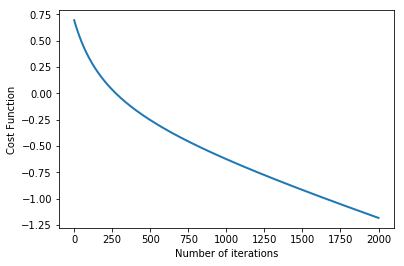

In [6]:
"""
Created on Tue Jul 10 10:32:43 2018

@author: aashish
"""

import numpy as np
import pandas as pd

##Implementing Logistic regression
# Calculate the sigma function given z
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Calculate the cost function
def cost_function(X,y,theta):
    m = X.shape[0]
    z = np.dot(X, theta.T)
    h = sigmoid(z)
    error = np.multiply(y, np.log(h)) + np.multiply((1 - y), np.log(1 - h))
    const = -1/m
    cost = const * sum(error)
    return cost

# Calculate the gradient and update the theta matrix
def gradientDescent(X, y, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(X.shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = cost_function(X, y, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = sigmoid((X * theta.T)) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = cost_function(X, y, theta)
        
    return theta, cost

##Load the data
titanic_train = pd.read_csv("train.csv")

##Preprocessing the training data
# Fill the missing value in "Age"
titanic_train["Age"] = titanic_train["Age"].fillna(titanic_train["Age"].median())
# Converting the Sex Column to numeric value
titanic_train.loc[titanic_train["Sex"] == "male", "Sex"] = 0
titanic_train.loc[titanic_train["Sex"] == "female", "Sex"] = 1
# Converting the Embarked Column
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("S")
titanic_train.loc[titanic_train["Embarked"] == "S", "Embarked"] = 0
titanic_train.loc[titanic_train["Embarked"] == "C", "Embarked"] = 1
titanic_train.loc[titanic_train["Embarked"] == "Q", "Embarked"] = 2

# Droping less useful data columns
titanic_train = titanic_train.drop(['Ticket','Cabin','Name','PassengerId'], axis=1) 

# Drop NaN values
titanic_train = titanic_train.dropna()

# Normalizing the dataset 
titanic_train = (titanic_train - titanic_train.mean()) / titanic_train.std()
print(titanic_train.shape)
# Separating the attributes and the target values
cols = titanic_train.shape[1]
X = titanic_train.iloc[1:,0:cols-1]
y = titanic_train.iloc[1:,cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))
print(X.shape, y.shape, theta.shape)
# Defining the hyperparametters
alpha = 0.01
iters = 2000

print ("Initial cost: ", cost_function(X, y, theta))

g, cost = gradientDescent(X, y, theta, alpha, iters)
print ("Theta: ", g)
print ("End cost:     ", cost_function(X, y, g))

plt.plot(cost, linewidth = 2)
plt.ylabel('Cost Function')
plt.xlabel('Number of iterations')
plt.show()
# Loading test data
titanic_test = pd.read_csv("test.csv")
##Preprocessing the training data
# Fill the missing value in "Age"
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())
# Converting the Sex Column to numeric value
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
# Converting the Embarked Column
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

# Droping less useful data columns
titanic_test = titanic_test.drop(['Ticket','Cabin','Name','PassengerId'], axis=1) 
# Drop NaN values
titanic_test = titanic_test.dropna()
# Normalizing the dataset 
titanic_test = (titanic_test - X.mean()) / X.std()
# Predictions for the test dataset
pred = np.matmul(titanic_test, g.T)